# Training and Visualizing a Decision Tree

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:,2:] #petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Trained trees can be visualized using the `export_graphviz()` method

In [4]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file='./images/iris_tree.dot',
        feature_names=iris.feature_names[2:],
        class_names = iris.target_names,
        rounded = True,
        filled = True
)

! dot -Tpng ./images/iris_tree.dot -o ./images/iris_tree.png


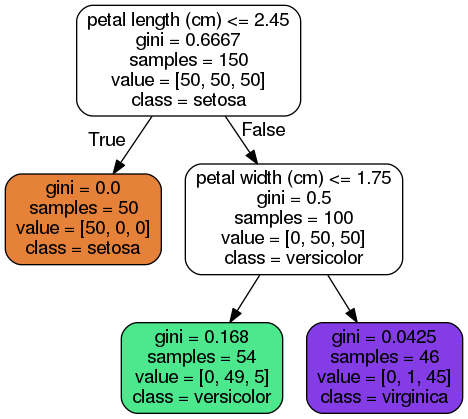


# Making Predictions

The idea behind a tree used for classification is 'asking questions' in each tree node. Each node divides the data into two classes according to a parameter and a threshold set for each node. For example, in the tree trained above the first criteria used for the division is the petal length of 2.45 cm. If the instance has a petal length less than or equal to 2.45 cm, it is sent to the left. Otherwise, the instance is sent to the right. An advantage of Decision Trees is that they require little data preparation. For example, data scaling or centering is not needed for Decision Trees.

Another advantage of decision tree is that their process of classification is easy to interpret. This is why this model is called a white box model. On the other hand, models where it is difficult to interpret the reasons that lead to a decision, such as Random Forests and Neural Networks, are called black box models. 

In the visualization, the `sample` attribute shows how many training instances are being used in that node and the `value` attribute shows how many instances of each class are in the node. The `gini` attribute measures the impurity of a node: the node is pure (`gini = 0`) when the node only has instances of only one class. The gini index in each node is given by the equation

$G = 1 - \sum_{k=1}^{n}p_{k}^{2}$

where $p_{k}$ is the ration of the class $k$ among the total instances in the node. For example, for the left node in the second level the gini index would be

$G = 1 - (\frac{0}{54})^{2} - (\frac{49}{54})^{2} - (\frac{5}{54})^{2}$

# Estimating Class Probabilities

Decision Trees can estimate the probability that an instace belongs to a certain class. This probability is calculated using the ratios of each class in the node in which the instance would belong. For example, a flower with petals 5 cm long and 1.5 cm wide would have 0% chance of being Setosa, 90.7% Versicolor, and 9.3% Virginica.


In [5]:
tree_clf.predict_proba([[5, 1.5]])

array([[ 0.        ,  0.90740741,  0.09259259]])

# The CART Training Algorithm

The algorithm used in Scikit-Learn to train the Decision Trees is called *Classification And Regression Tree* (CART). The idea of this algorithm was described earlier: split the data into two sets according to a feature $k$ and a value $t_{k}$. The values for $k$ and $t_{k}$ are chosen so the pair $(k, t_{k})$ is that one that results in the most purest subsets. With that in mind, the cost function of the CART algorithm is

$J(k, t_{k}) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}$

where $G$ is the gini index and $m$ the number of instances in each subset. 

This procedure is repeated until the tree reaches its maximum depth or when the algorithm cannot find a split that reduces impurity. Other conditions can be set in the hyperparameters to control the stopping conditions.

The problem of the CART algorithm is that it is a greedy algorithm. It searches for the optimal split at each level but does not guarantee that the splits in the upper levels will lead to the lowest possible impurity in the bottom levels. This is why the solution found using Decision Trees is a good solution but not necessary the best solution. 

Other problem encountered when using the CART algorithm is that it requires $O(\exp(m))$ time to reach a solution, because it is solvig an NP-Complete problem. This exponential dependence makes the time for large datasets too large for practical purposes.